# **Bookings Dataset Cleaning Process**

Here are the steps for data cleaning for the overall booking dataset. First, we will import some libraries that we will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Next, we will read the dataset from Bookings_2024_05_29.csv.

In [8]:
dataset = pd.read_csv('Bookings_2024_05_29.csv')

And then we will display some of dataset rows.

In [3]:
dataset.head()

,booking_id,unit_id,created_at,booking_check_in,booking_check_out,booking_window,length_of_stay,earnings_in_idr,earnings_per_day,average_baseline_price,rating,review_sentiment_score,communication,cleanliness,accuracy
0,01-04-2021-Jan,UN2560,2021-02-22 03:24,2021-04-01,2021-06-01,38,61,17000000.0,2.786885e+05,2.945710e+05,NaN,NaN,NaN,NaN,NaN
1,01-04-2023Luis,UN2734,2023-02-23 03:17,2023-04-01,2023-05-01,37,30,32500000.0,1.083333e+06,1.745023e+06,NaN,NaN,NaN,NaN,NaN
2,01-06-2023Rosa,UN2782,2023-05-20 07:16,2023-06-01,2023-06-04,12,3,5320000.0,1.773333e+06,1.866635e+06,NaN,NaN,NaN,NaN,NaN
3,01-10-2021Rozif,UN2416,2021-10-02 02:07,2021-10-03,2021-10-04,1,1,370000.0,3.700000e+05,4.097303e+05,NaN,NaN,NaN,NaN,NaN
4,01-12-2023,UN1293,2023-11-28 13:06,2023-12-01,2023-12-02,3,1,2000000.0,2.000000e+06,2.285395e+06,NaN,NaN,NaN,NaN,NaN


We will check the shape of dataset.

In [ ]:
dataset.shape

(61059, 15)

It shows that the dataset have 61059 rows and 15 features. Next we want to know about the information of the dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61059 entries, 0 to 61058
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_id              61059 non-null  object 
 1   unit_id                 61055 non-null  object 
 2   created_at              61059 non-null  object 
 3   booking_check_in        61059 non-null  object 
 4   booking_check_out       61059 non-null  object 
 5   booking_window          61059 non-null  int64  
 6   length_of_stay          61059 non-null  int64  
 7   earnings_in_idr         61059 non-null  float64
 8   earnings_per_day        61059 non-null  float64
 9   average_baseline_price  60626 non-null  float64
 10  rating                  18164 non-null  float64
 11  review_sentiment_score  17317 non-null  float64
 12  communication           18163 non-null  float64
 13  cleanliness             18164 non-null  float64
 14  accuracy                18163 non-null

Next step we will check is there any duplicates on dataset.

In [9]:
duplicates = dataset.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 297


So far, we have known that there are 297 duplicates data rows that need to be drop.

In [10]:
dataset = dataset.drop_duplicates()

Next, we will drop some features that we won't use in the training section, which are booking_id and created_at.

In [11]:
features_to_drop = ['booking_id', 'created_at', 'booking_check_in','booking_check_out']
dataset = dataset.drop(columns=features_to_drop)

Next we can check it again the dataset info.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60762 entries, 0 to 61058
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_window          60762 non-null  int64  
 1   length_of_stay          60762 non-null  int64  
 2   earnings_in_idr         60762 non-null  float64
 3   earnings_per_day        60762 non-null  float64
 4   average_baseline_price  60330 non-null  float64
 5   rating                  17869 non-null  float64
 6   review_sentiment_score  17092 non-null  float64
 7   communication           17868 non-null  float64
 8   cleanliness             17869 non-null  float64
 9   accuracy                17868 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 5.1 MB


After that, we will drop rows that have a null unit_id.

In [12]:
dataset = dataset.dropna(subset=['unit_id'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60758 entries, 0 to 61058
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unit_id                 60758 non-null  object 
 1   booking_window          60758 non-null  int64  
 2   length_of_stay          60758 non-null  int64  
 3   earnings_in_idr         60758 non-null  float64
 4   earnings_per_day        60758 non-null  float64
 5   average_baseline_price  60330 non-null  float64
 6   rating                  17868 non-null  float64
 7   review_sentiment_score  17091 non-null  float64
 8   communication           17867 non-null  float64
 9   cleanliness             17868 non-null  float64
 10  accuracy                17867 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.6+ MB


Next, we will handle the missing values in the average_baseline_price feature. However, before that, we will look at the dataset description.

In [13]:
dataset.describe()

,booking_window,length_of_stay,earnings_in_idr,earnings_per_day,average_baseline_price,rating,review_sentiment_score,communication,cleanliness,accuracy
count,60758.000000,60758.000000,6.075800e+04,6.075800e+04,6.033000e+04,17868.000000,17091.000000,17867.000000,17868.000000,17867.000000
mean,17.182725,3.774235,2.759030e+06,8.431804e+05,8.449741e+05,4.546004,0.683720,4.645324,4.489814,4.609056
std,32.403901,6.309438,4.736202e+06,8.250003e+05,6.506421e+05,0.855653,0.460401,0.817755,0.888007,0.812634
min,-367.000000,-28.000000,1.000010e+05,-9.000000e+06,1.417987e+05,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,7.500000e+05,3.800599e+05,4.774102e+05,4.000000,0.700000,5.000000,4.000000,4.000000
50%,4.000000,2.000000,1.500000e+06,5.616988e+05,6.576314e+05,5.000000,0.900000,5.000000,5.000000,5.000000
75%,20.000000,4.000000,3.070618e+06,1.007195e+06,9.630754e+05,5.000000,0.900000,5.000000,5.000000,5.000000
max,716.000000,365.000000,2.450000e+08,2.287367e+07,9.677795e+06,5.000000,1.000000,5.000000,5.000000,5.000000


Next, we will check whether the 'average_baseline_price' feature follows a normal distribution or not.

In [14]:
from scipy.stats import kstest

stat, p = kstest(dataset['average_baseline_price'].dropna(), 'norm', args=(dataset['average_baseline_price'].mean(), dataset['average_baseline_price'].std()))
print(f'Statistic: {stat}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print(f'{"average_baseline_price"} looks Gaussian (fail to reject H0)')
else:
    print(f'{"average_baseline_price"} does not look Gaussian (reject H0)')


Statistic: 0.19122237558079602, p-value: 0.0
average_baseline_price does not look Gaussian (reject H0)


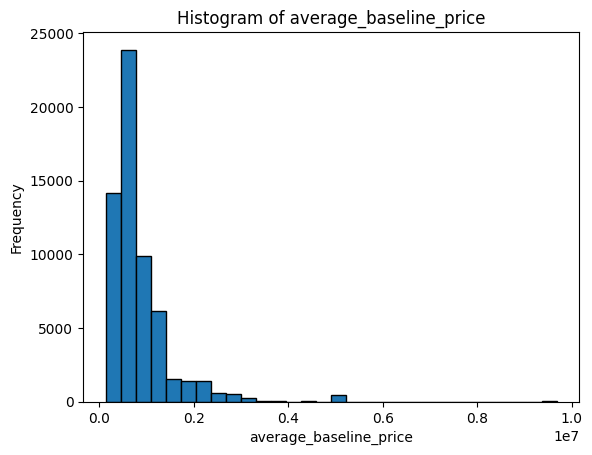

In [15]:
column = 'average_baseline_price'
plt.hist(dataset[column].dropna(), bins=30, edgecolor='k')
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


 From the histogram and tests conducted, it can be concluded that the data in that column does not follow a normal distribution. So we will try to use median to fill missing values.

In [16]:
median_average_baseline_price = dataset['average_baseline_price'].median()
dataset['average_baseline_price'].fillna(median_average_baseline_price, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60758 entries, 0 to 61058
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unit_id                 60758 non-null  object 
 1   booking_check_in        60758 non-null  object 
 2   booking_check_out       60758 non-null  object 
 3   booking_window          60758 non-null  int64  
 4   length_of_stay          60758 non-null  int64  
 5   earnings_in_idr         60758 non-null  float64
 6   earnings_per_day        60758 non-null  float64
 7   average_baseline_price  60758 non-null  float64
 8   rating                  17868 non-null  float64
 9   review_sentiment_score  17091 non-null  float64
 10  communication           17867 non-null  float64
 11  cleanliness             17868 non-null  float64
 12  accuracy                17867 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 6.5+ MB


Next step we will handle other features that have missing values using KNN Imputer.

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dataset[['rating', 'review_sentiment_score', 'communication', 'cleanliness', 'accuracy']] = imputer.fit_transform(dataset[['rating', 'review_sentiment_score', 'communication', 'cleanliness', 'accuracy']])


In [18]:
dataset.describe()

,booking_window,length_of_stay,earnings_in_idr,earnings_per_day,average_baseline_price,rating,review_sentiment_score,communication,cleanliness,accuracy
count,60758.000000,60758.000000,6.075800e+04,6.075800e+04,6.075800e+04,60758.000000,60758.000000,60758.000000,60758.000000,60758.000000
mean,17.182725,3.774235,2.759030e+06,8.431804e+05,8.436544e+05,4.545662,0.681456,4.645005,4.489269,4.608612
std,32.403901,6.309438,4.736202e+06,8.250003e+05,6.485356e+05,0.466489,0.252460,0.445183,0.483949,0.442570
min,-367.000000,-28.000000,1.000010e+05,-9.000000e+06,1.417987e+05,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,7.500000e+05,3.800599e+05,4.774102e+05,4.546004,0.683720,4.645324,4.489814,4.609056
50%,4.000000,2.000000,1.500000e+06,5.616988e+05,6.576314e+05,4.546004,0.683720,4.645324,4.489814,4.609056
75%,20.000000,4.000000,3.070618e+06,1.007195e+06,9.549556e+05,4.546004,0.683720,4.645324,4.489814,4.609056
max,716.000000,365.000000,2.450000e+08,2.287367e+07,9.677795e+06,5.000000,1.000000,5.000000,5.000000,5.000000


In [19]:
file_path = 'CLEAN_Bookings_08_06_2024.csv'
dataset.to_csv(file_path,index=False )